In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
import umap

In [2]:
df = pd.read_csv("CC GENERAL.csv")
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [4]:
df = df.drop('CUST_ID', axis=1)  # remove identifier column
df.fillna(df.mean(), inplace=True)


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [7]:
skew_col=df.skew()
skew_col

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [8]:
skew_col=skew_col[abs(skew_col)>0.5]
skew_col

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522549
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.867357
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

In [9]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
for col in skew_col.index:
    df[col] = pt.fit_transform(df[[col]])

print(df.skew())

BALANCE                            -0.119428
BALANCE_FREQUENCY                  -1.118938
PURCHASES                          -0.178677
ONEOFF_PURCHASES                    0.115147
INSTALLMENTS_PURCHASES             -0.014843
CASH_ADVANCE                        0.188413
PURCHASES_FREQUENCY                 0.060164
ONEOFF_PURCHASES_FREQUENCY          0.541358
PURCHASES_INSTALLMENTS_FREQUENCY    0.217056
CASH_ADVANCE_FREQUENCY              0.506434
CASH_ADVANCE_TRX                    0.392581
PURCHASES_TRX                       0.006058
CREDIT_LIMIT                       -0.009668
PAYMENTS                            0.124631
MINIMUM_PAYMENTS                   -0.018098
PRC_FULL_PAYMENT                    0.963939
TENURE                             -1.971472
dtype: float64


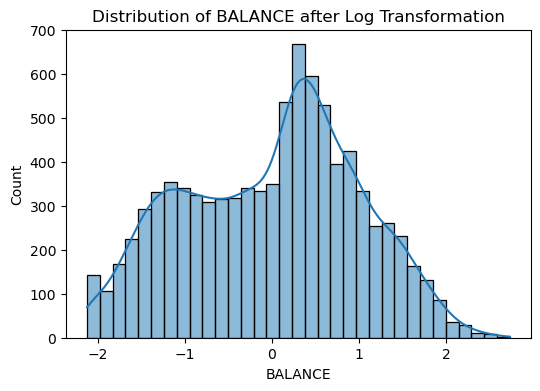

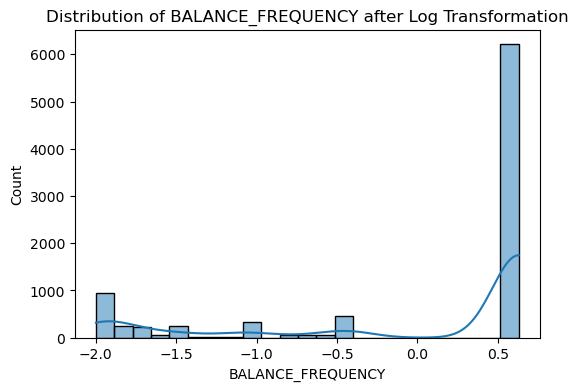

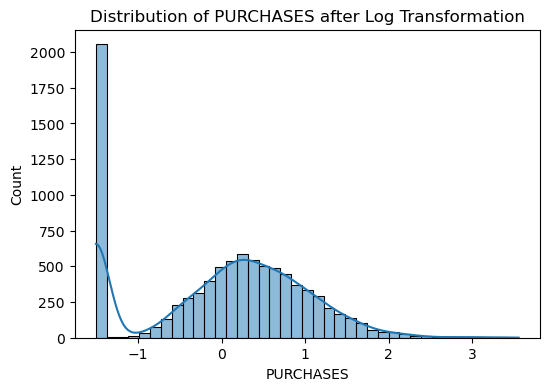

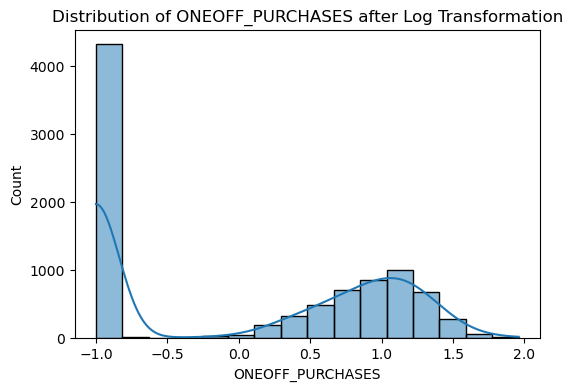

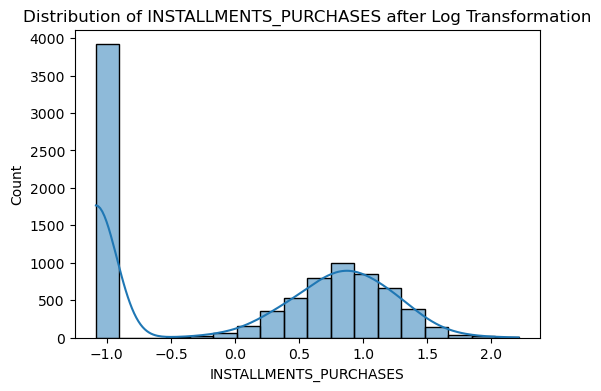

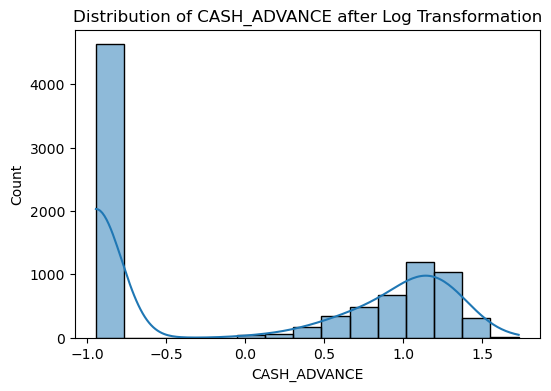

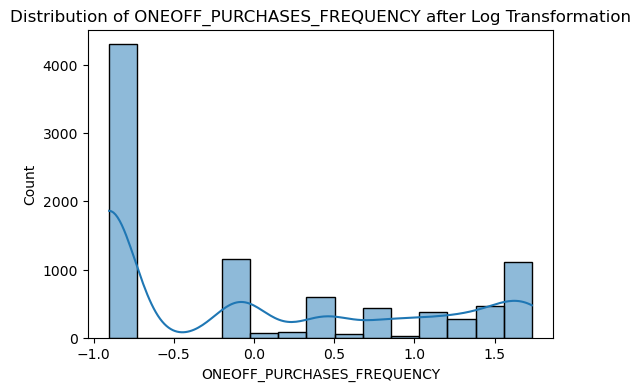

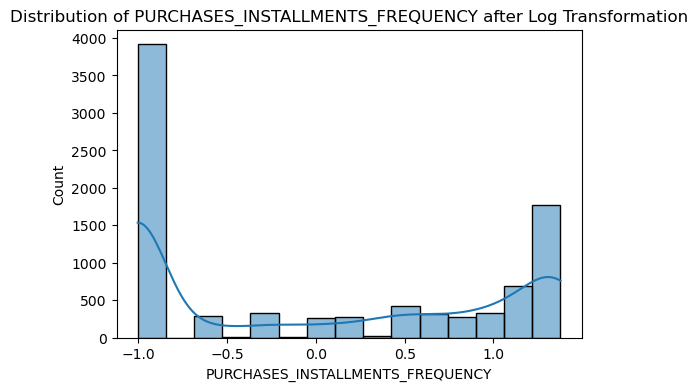

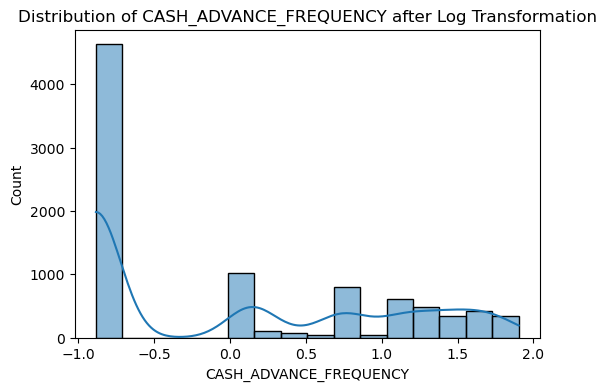

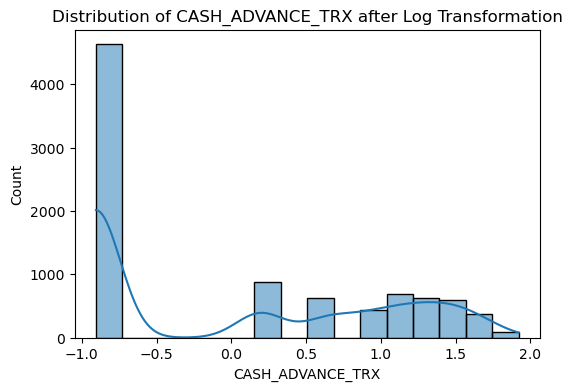

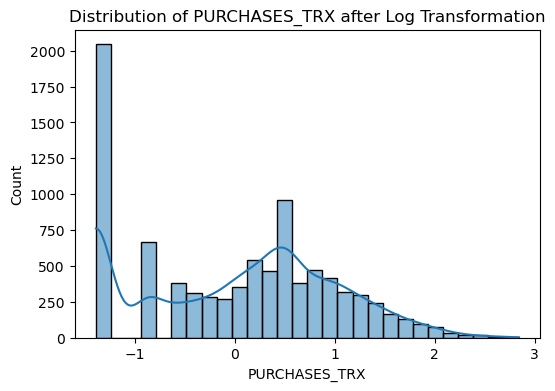

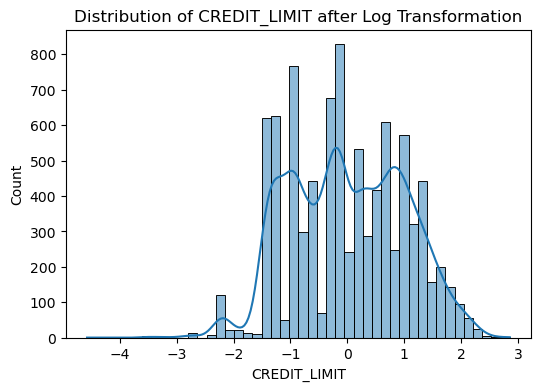

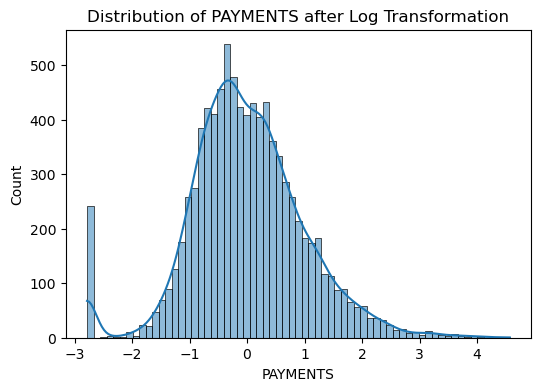

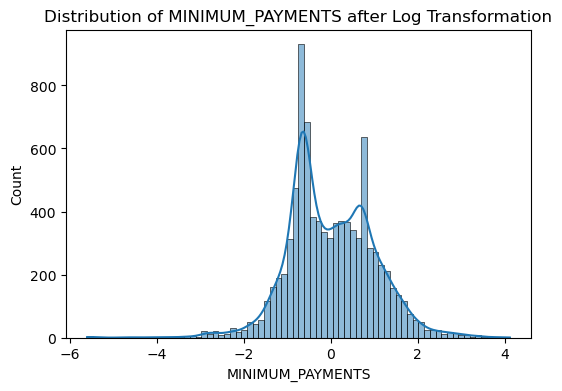

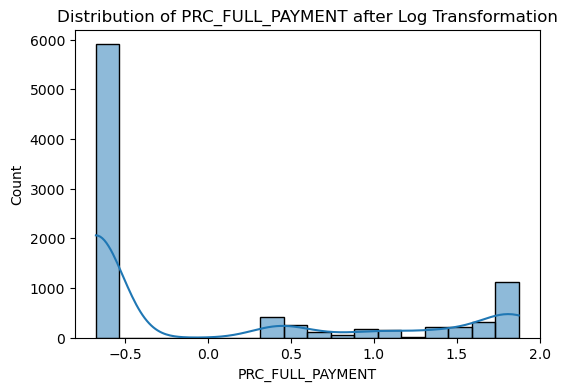

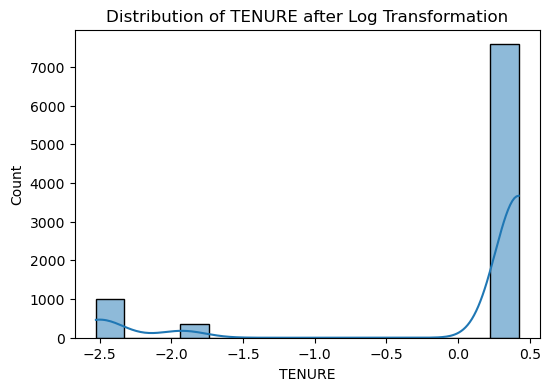

In [10]:
for col in skew_col.index:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after Log Transformation')
    plt.show()

In [11]:
corr=df.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.569356,-0.018376,0.147502,-0.116824,0.541387,-0.112952,0.142898,-0.134734,0.539904,0.545134,-0.037247,0.366947,0.438160,0.773960,-0.481358,0.066849
BALANCE_FREQUENCY,0.569356,1.000000,0.122669,0.127351,0.106004,0.155316,0.224611,0.174722,0.153006,0.187437,0.184013,0.191586,0.104388,0.213221,0.422443,-0.178108,0.203264
PURCHASES,-0.018376,0.122669,1.000000,0.709480,0.688342,-0.455515,0.782490,0.683361,0.621225,-0.428236,-0.434099,0.905108,0.247049,0.326916,-0.012951,0.251576,0.129485
ONEOFF_PURCHASES,0.147502,0.127351,0.709480,1.000000,0.154552,-0.193098,0.364597,0.927358,0.094973,-0.170820,-0.174784,0.564103,0.277491,0.297588,0.049206,0.027112,0.091656
INSTALLMENTS_PURCHASES,-0.116824,0.106004,0.688342,0.154552,1.000000,-0.400327,0.795121,0.178464,0.932724,-0.380649,-0.382794,0.784044,0.108295,0.177224,-0.047949,0.283664,0.117148
CASH_ADVANCE,0.541387,0.155316,-0.455515,-0.193098,-0.400327,1.000000,-0.438869,-0.190959,-0.387122,0.939112,0.961687,-0.440070,0.098112,0.203401,0.389523,-0.302631,-0.108365
PURCHASES_FREQUENCY,-0.112952,0.224611,0.782490,0.364597,0.795121,-0.438869,1.000000,0.456139,0.862904,-0.411471,-0.417103,0.909853,0.113432,0.178341,-0.064334,0.308943,0.089223
ONEOFF_PURCHASES_FREQUENCY,0.142898,0.174722,0.683361,0.927358,0.178464,-0.190959,0.456139,1.000000,0.125162,-0.165016,-0.171965,0.621445,0.280531,0.300899,0.040377,0.072578,0.085142
PURCHASES_INSTALLMENTS_FREQUENCY,-0.134734,0.153006,0.621225,0.094973,0.932724,-0.387122,0.862904,0.125162,1.000000,-0.367218,-0.369610,0.777299,0.053980,0.121851,-0.058642,0.272800,0.093692
CASH_ADVANCE_FREQUENCY,0.539904,0.187437,-0.428236,-0.170820,-0.380649,0.939112,-0.411471,-0.165016,-0.367218,1.000000,0.980066,-0.410532,0.086492,0.197442,0.383494,-0.299452,-0.126706


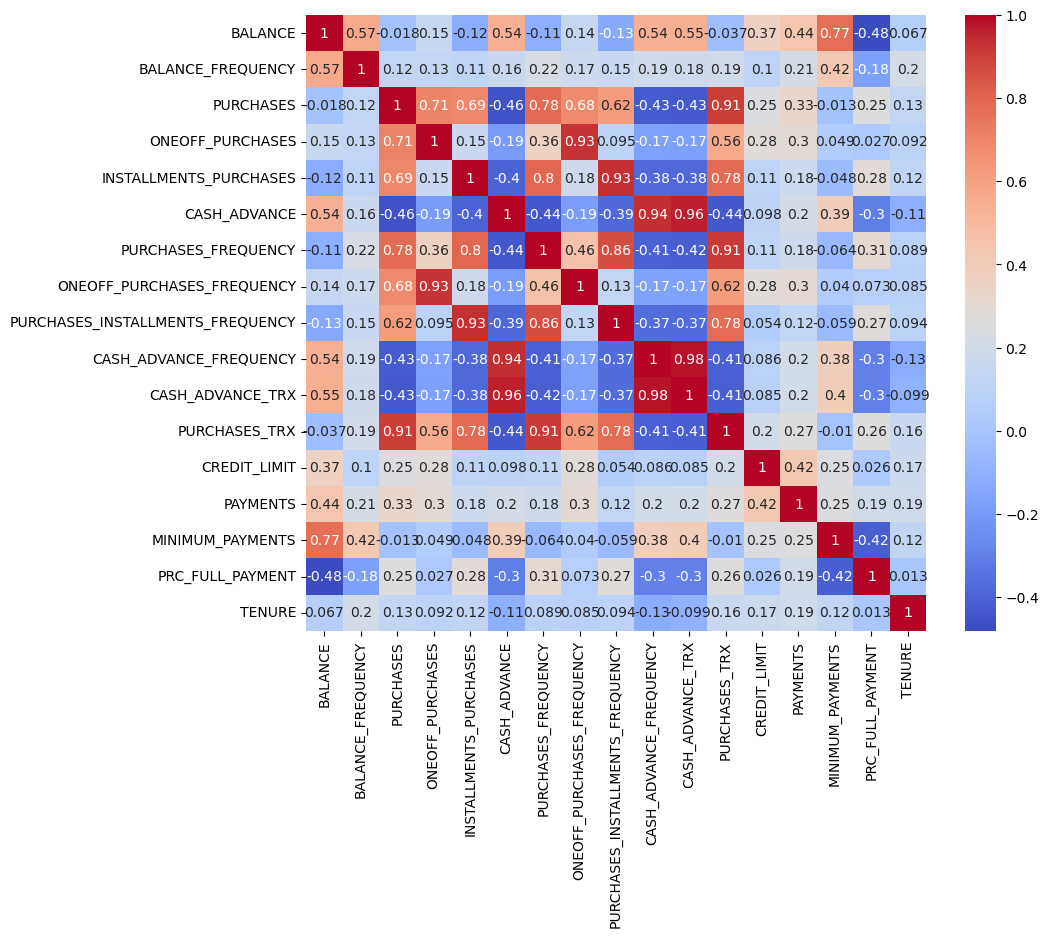

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.show()

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

outlier_counts = {}
for col in df.columns:
    if df[col].dtype != 'object':
        lower_bound = Q1[col] - 1.5 * IQR[col]
        upper_bound = Q3[col] + 1.5 * IQR[col]
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)

for col, count in outlier_counts.items():
    print(f"Column '{col}': {count} outliers")

Column 'BALANCE': 0 outliers
Column 'BALANCE_FREQUENCY': 0 outliers
Column 'PURCHASES': 20 outliers
Column 'ONEOFF_PURCHASES': 0 outliers
Column 'INSTALLMENTS_PURCHASES': 0 outliers
Column 'CASH_ADVANCE': 0 outliers
Column 'PURCHASES_FREQUENCY': 0 outliers
Column 'ONEOFF_PURCHASES_FREQUENCY': 0 outliers
Column 'PURCHASES_INSTALLMENTS_FREQUENCY': 0 outliers
Column 'CASH_ADVANCE_FREQUENCY': 0 outliers
Column 'CASH_ADVANCE_TRX': 0 outliers
Column 'PURCHASES_TRX': 0 outliers
Column 'CREDIT_LIMIT': 6 outliers
Column 'PAYMENTS': 402 outliers
Column 'MINIMUM_PAYMENTS': 127 outliers
Column 'PRC_FULL_PAYMENT': 0 outliers
Column 'TENURE': 1366 outliers


In [14]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

mask = (df >= lower_bound) & (df <= upper_bound)
mask = mask.all(axis=1)

df = df[mask]

print("Outlier counts after removal:")
outlier_counts_after = {}
for col in df.columns:
    if df[col].dtype != 'object':
        lower_bound_after = Q1[col] - 1.5 * IQR[col]
        upper_bound_after = Q3[col] + 1.5 * IQR[col]
        outliers_after = df[(df[col] < lower_bound_after) | (df[col] > upper_bound_after)]
        outlier_counts_after[col] = len(outliers_after)

for col, count in outlier_counts_after.items():
    print(f"Column '{col}': {count} outliers")

Outlier counts after removal:
Column 'BALANCE': 0 outliers
Column 'BALANCE_FREQUENCY': 0 outliers
Column 'PURCHASES': 0 outliers
Column 'ONEOFF_PURCHASES': 0 outliers
Column 'INSTALLMENTS_PURCHASES': 0 outliers
Column 'CASH_ADVANCE': 0 outliers
Column 'PURCHASES_FREQUENCY': 0 outliers
Column 'ONEOFF_PURCHASES_FREQUENCY': 0 outliers
Column 'PURCHASES_INSTALLMENTS_FREQUENCY': 0 outliers
Column 'CASH_ADVANCE_FREQUENCY': 0 outliers
Column 'CASH_ADVANCE_TRX': 0 outliers
Column 'PURCHASES_TRX': 0 outliers
Column 'CREDIT_LIMIT': 0 outliers
Column 'PAYMENTS': 0 outliers
Column 'MINIMUM_PAYMENTS': 0 outliers
Column 'PRC_FULL_PAYMENT': 0 outliers
Column 'TENURE': 0 outliers


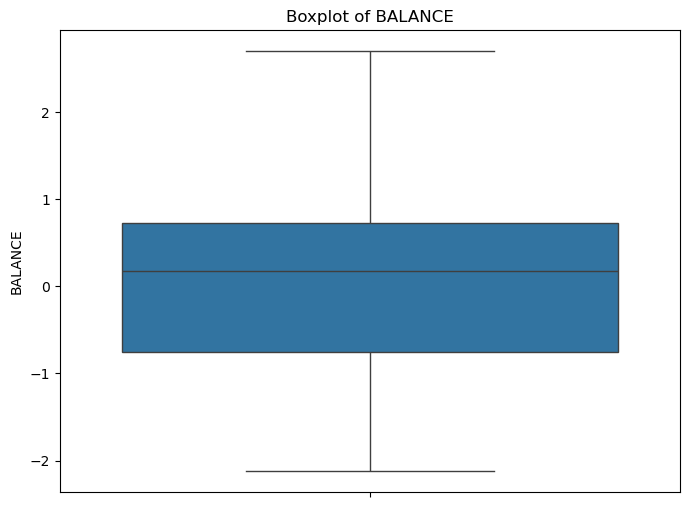

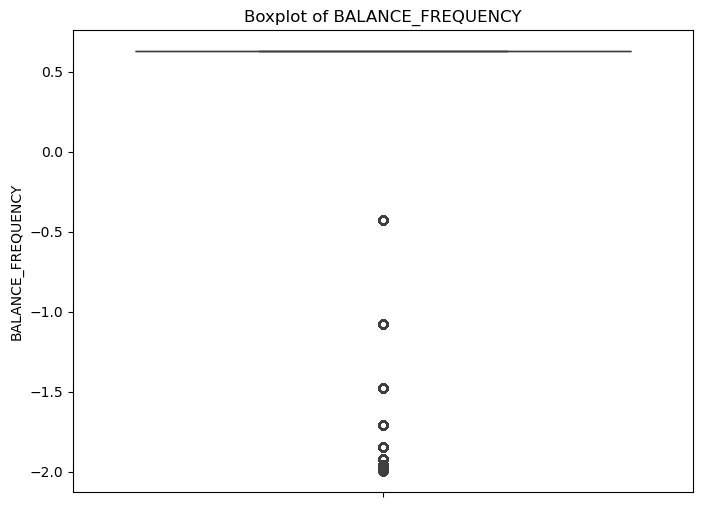

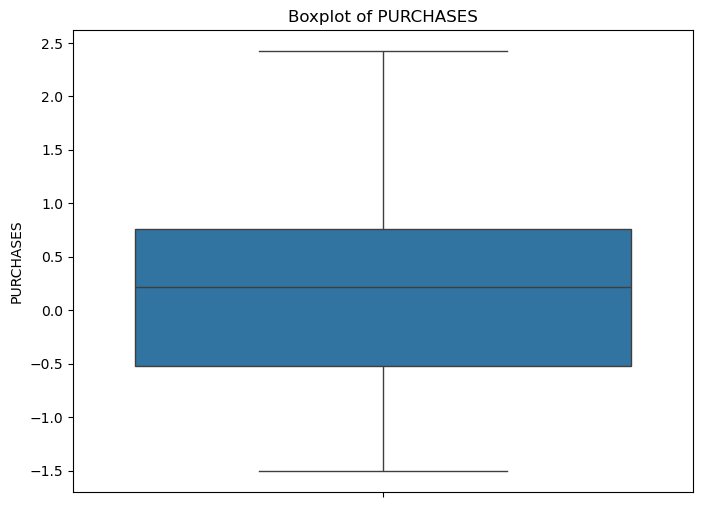

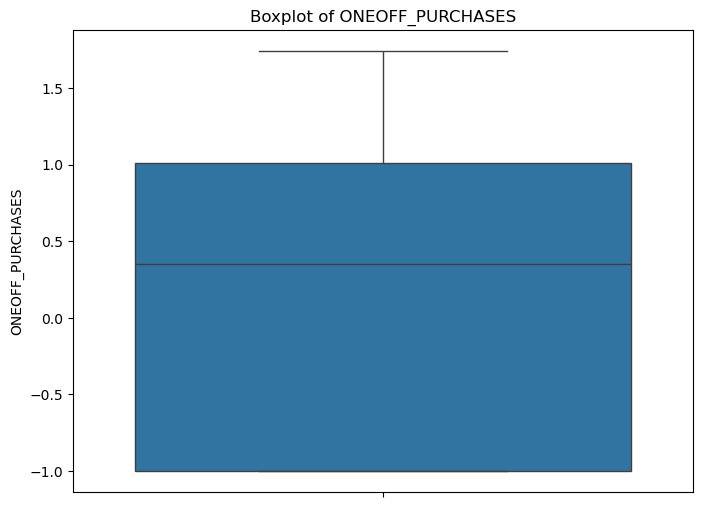

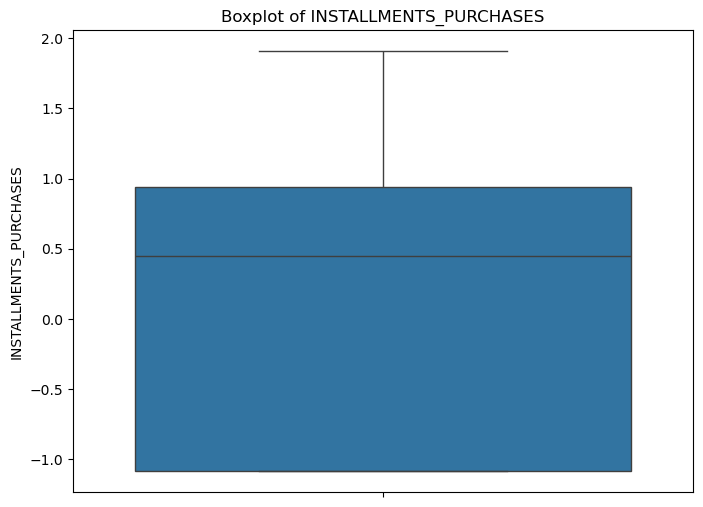

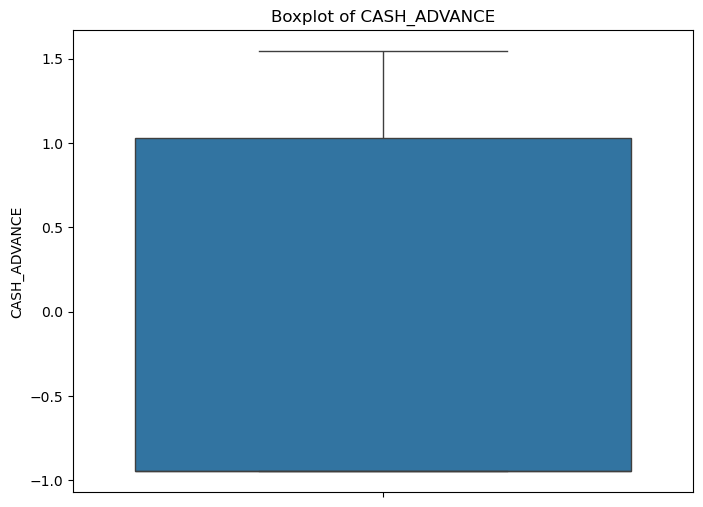

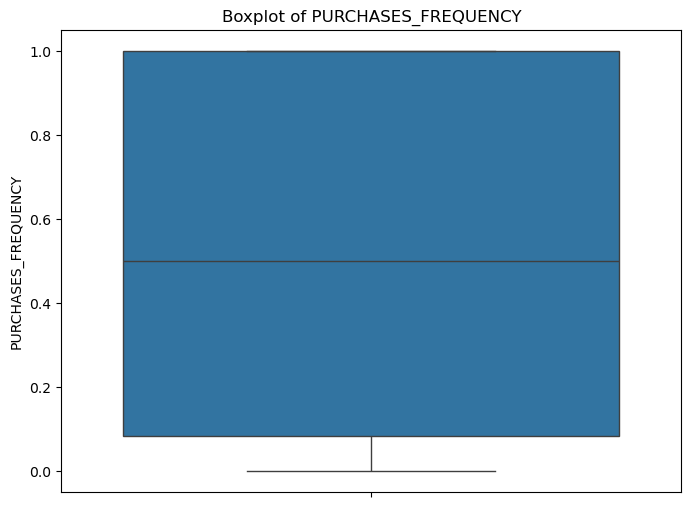

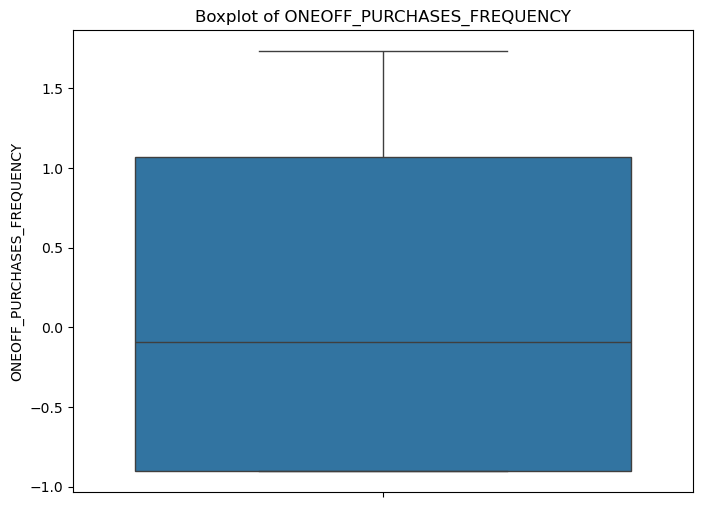

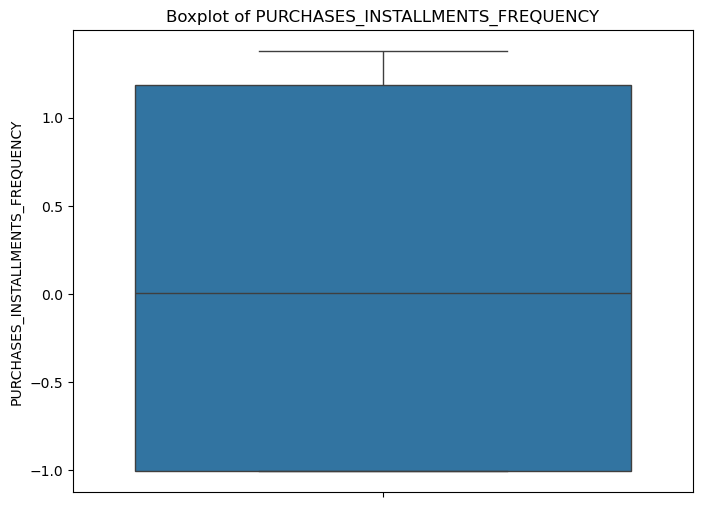

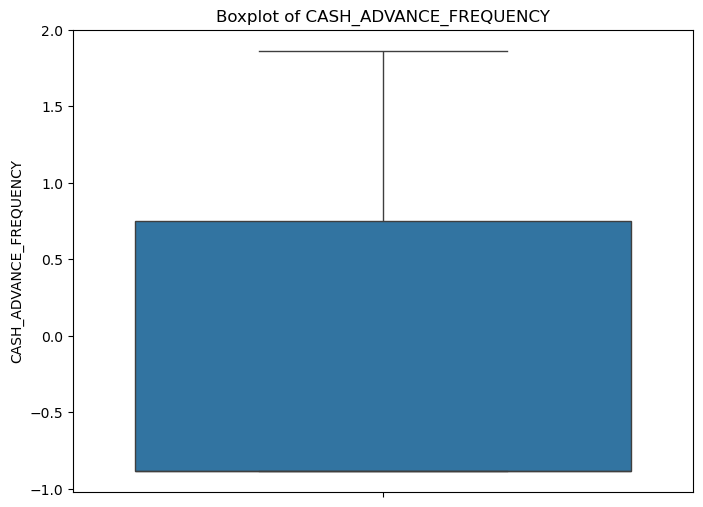

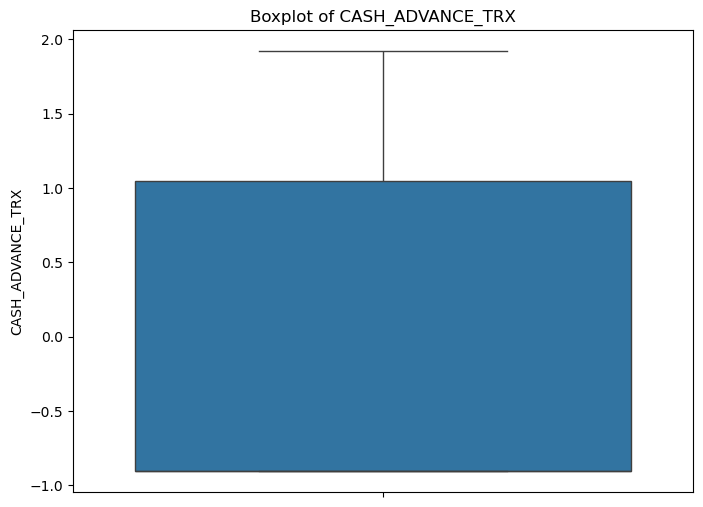

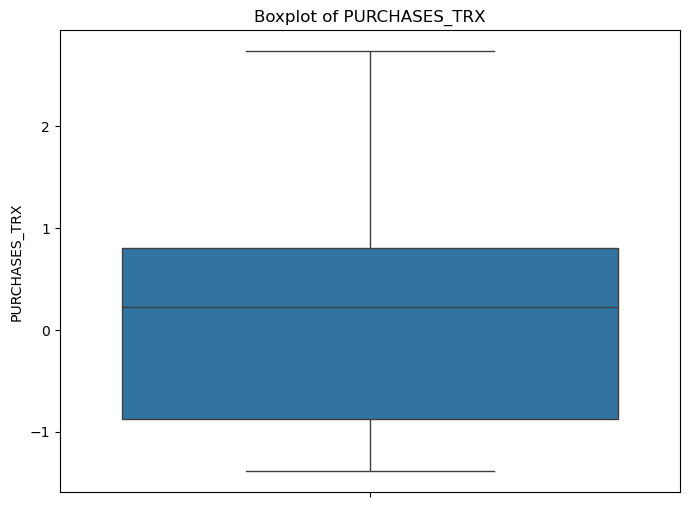

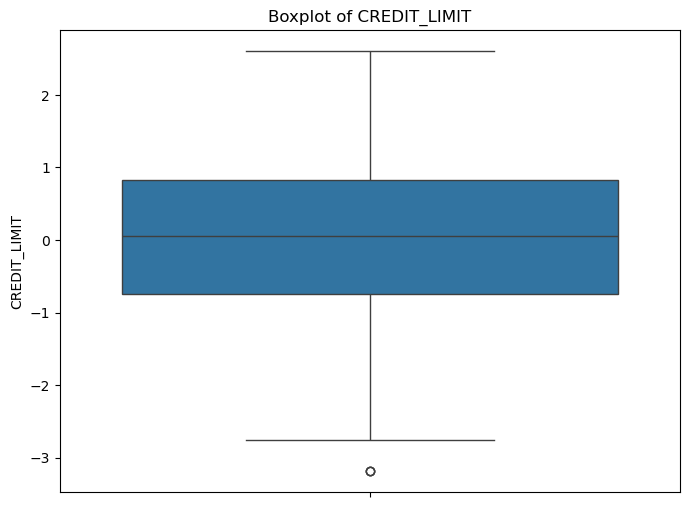

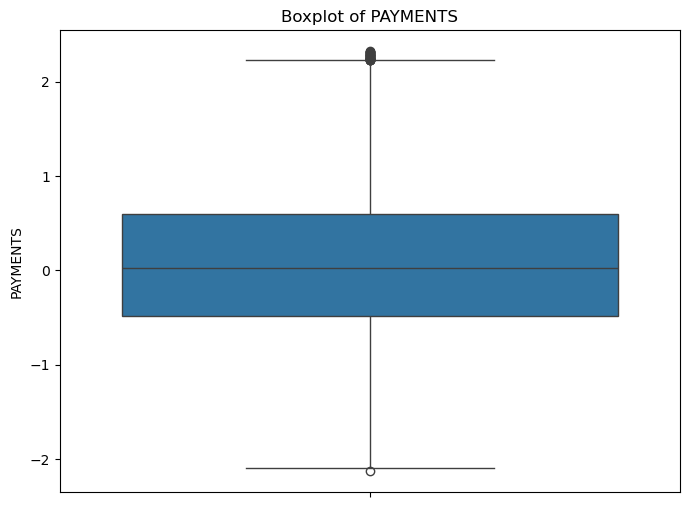

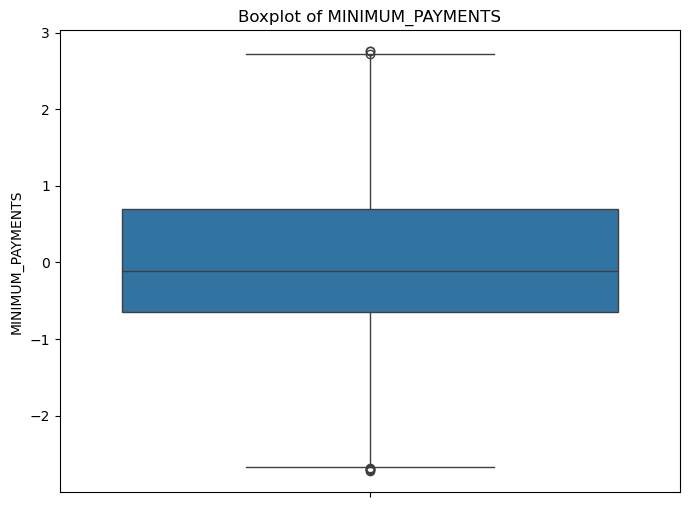

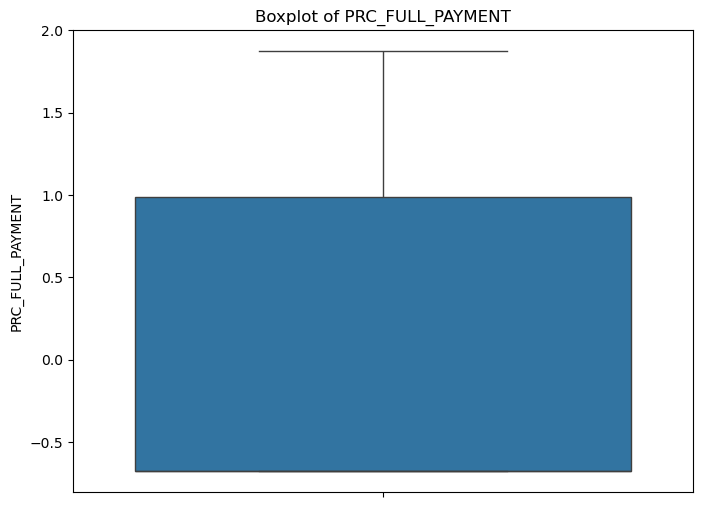

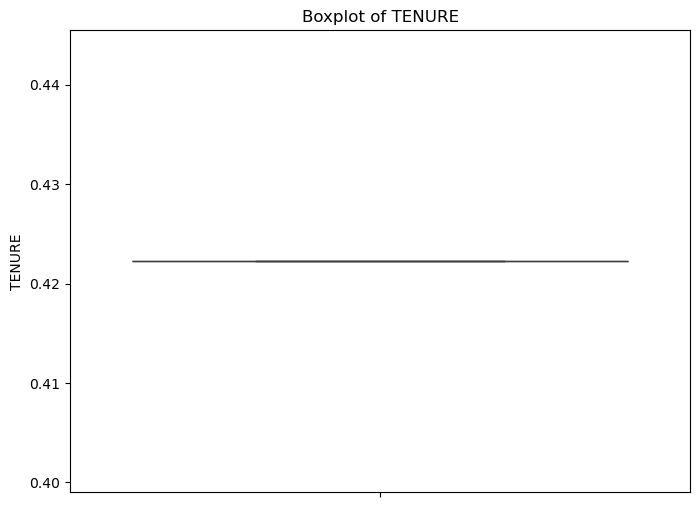

In [15]:
for col in df.columns:
    if df[col].dtype != 'object':
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot of {col}')
        plt.ylabel(col)
        plt.show()

In [16]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [17]:
variance=df.var()
print(variance)

BALANCE                             9.404547e-01
BALANCE_FREQUENCY                   8.884991e-01
PURCHASES                           9.515807e-01
ONEOFF_PURCHASES                    9.947028e-01
INSTALLMENTS_PURCHASES              9.962613e-01
CASH_ADVANCE                        9.736949e-01
PURCHASES_FREQUENCY                 1.598389e-01
ONEOFF_PURCHASES_FREQUENCY          1.017063e+00
PURCHASES_INSTALLMENTS_FREQUENCY    1.007041e+00
CASH_ADVANCE_FREQUENCY              9.626494e-01
CASH_ADVANCE_TRX                    9.811406e-01
PURCHASES_TRX                       9.900100e-01
CREDIT_LIMIT                        9.464916e-01
PAYMENTS                            6.361883e-01
MINIMUM_PAYMENTS                    8.247682e-01
PRC_FULL_PAYMENT                    1.004992e+00
TENURE                              1.412533e-27
dtype: float64


In [18]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.1)
reduced = selector.fit_transform(df_scaled)
print("Shape after variance threshold:", reduced.shape)


Shape after variance threshold: (7153, 16)


In [19]:
pca = PCA(0.95)
scaled_pca = pca.fit_transform(df_scaled)

print("Number of components:", scaled_pca.shape[1])

Number of components: 8


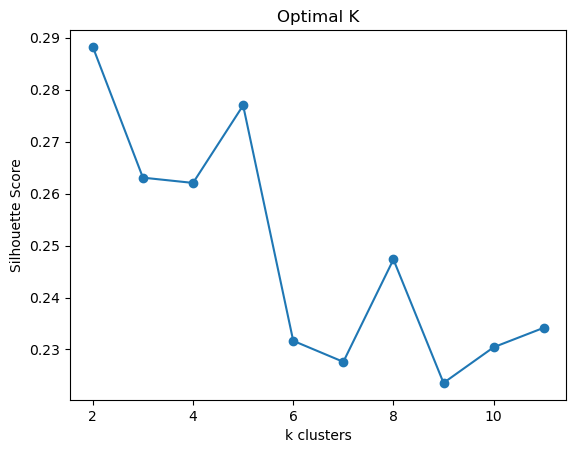

2

In [20]:
sil_scores = []
K = range(2, 12)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_pca)
    sil_scores.append(silhouette_score(scaled_pca, labels))

plt.plot(K, sil_scores, marker='o')
plt.xlabel("k clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal K")
plt.show()

best_k = K[np.argmax(sil_scores)]
best_k


In [21]:
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans_labels = kmeans.fit_predict(scaled_pca)

sil_kmeans = silhouette_score(scaled_pca, kmeans_labels)
print("KMeans Silhouette:", sil_kmeans)


KMeans Silhouette: 0.2882289091496433


In [22]:
hc = AgglomerativeClustering(n_clusters=best_k)
hc_labels = hc.fit_predict(scaled_pca)

sil_hc = silhouette_score(scaled_pca, hc_labels)
print("HC Silhouette:", sil_hc)


HC Silhouette: 0.2686269763038634


In [23]:
dbscan = DBSCAN(eps=1.8, min_samples=10)
dbscan_labels = dbscan.fit_predict(scaled_pca)

mask = dbscan_labels != -1
if np.sum(mask) > 0:
    sil_dbscan = silhouette_score(scaled_pca[mask], dbscan_labels[mask])
    print("DBSCAN Silhouette (excluding noise):", sil_dbscan)
else:
    print("DBSCAN failed to form valid clusters.")


DBSCAN Silhouette (excluding noise): 0.2774765904853517


In [24]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest(contamination=0.04, random_state=42)
pred = iso.fit_predict(df_scaled)
mask = pred != -1  # keep non-outliers

df_clean = df[mask]
scaled_clean = df_scaled[mask]

print("Original shape:", df.shape)
print("After outlier removal:", df_clean.shape)


Original shape: (7153, 17)
After outlier removal: (6866, 17)


In [25]:
sil_scores = []
K = range(2, 12)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(scaled_clean)
    sil_scores.append(silhouette_score(scaled_clean, labels))

best_k2 = K[np.argmax(sil_scores)]

print("Best k after outlier removal:", best_k2)
print("New Best Silhouette:", max(sil_scores))

Best k after outlier removal: 2
New Best Silhouette: 0.2900882409149582


In [26]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.15)
reduced = selector.fit_transform(scaled_clean)
print("Shape before:", scaled_clean.shape)
print("Shape after:", reduced.shape)


Shape before: (6866, 17)
Shape after: (6866, 16)


In [27]:
from umap import UMAP
best_neighbors = 20  # set from print result
best_k = 4           # set from print result

umap_final = UMAP(n_neighbors=best_neighbors, min_dist=0.0, random_state=42)
embed_final = umap_final.fit_transform(reduced)

kmeans_final = KMeans(n_clusters=best_k, random_state=42)
final_labels = kmeans_final.fit_predict(embed_final)

final_sil = silhouette_score(embed_final, final_labels)
print("Final Silhouette Score:", final_sil)

c:\Users\Arun kumar\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Final Silhouette Score: 0.6995605


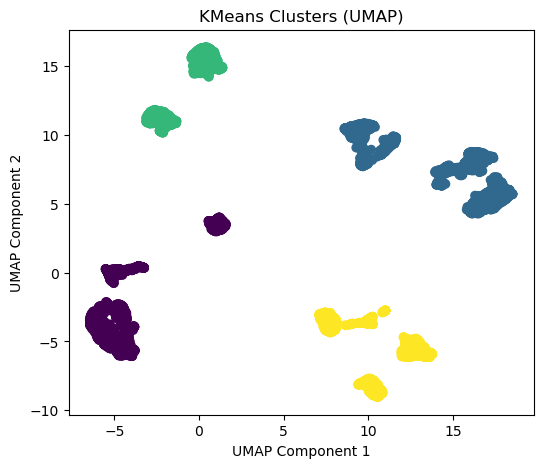

In [28]:


plt.figure(figsize=(6, 5))
plt.scatter(embed_final[:,0], embed_final[:,1], c=final_labels)
plt.title("KMeans Clusters (UMAP)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

In [29]:

hc_umap = AgglomerativeClustering(n_clusters=best_k, linkage='ward')
hc_umap_labels = hc_umap.fit_predict(embed_final)

sil_hc_umap = silhouette_score(embed_final, hc_umap_labels)
print(f"Hierarchical Clustering (UMAP) - Silhouette Score: {sil_hc_umap:.4f}")

Hierarchical Clustering (UMAP) - Silhouette Score: 0.6996


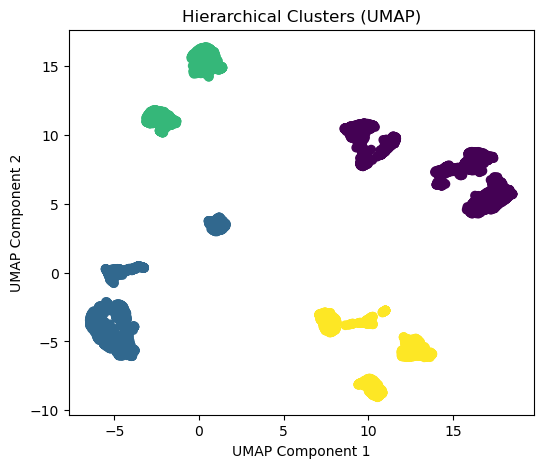

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
plt.scatter(embed_final[:,0], embed_final[:,1], c=hc_umap_labels)
plt.title("Hierarchical Clusters (UMAP)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

In [31]:
db_umap = DBSCAN(eps=0.1, min_samples=5)
db_umap_labels = db_umap.fit_predict(embed_final)


if len(set(db_umap_labels)) > 1 and -1 in set(db_umap_labels) and len(set(db_umap_labels)) > 2:
    sil_db_umap = silhouette_score(embed_final[db_umap_labels != -1], db_umap_labels[db_umap_labels != -1])
    print(f"DBSCAN (UMAP) - Silhouette Score (excluding noise): {sil_db_umap:.4f}")
elif len(set(db_umap_labels)) > 1 and -1 not in set(db_umap_labels):
     sil_db_umap = silhouette_score(embed_final, db_umap_labels)
     print(f"DBSCAN (UMAP) - Silhouette Score: {sil_db_umap:.4f}")
else:
    print("DBSCAN (UMAP) - Could not calculate Silhouette Score (only one cluster or all noise).")

DBSCAN (UMAP) - Silhouette Score (excluding noise): 0.2542


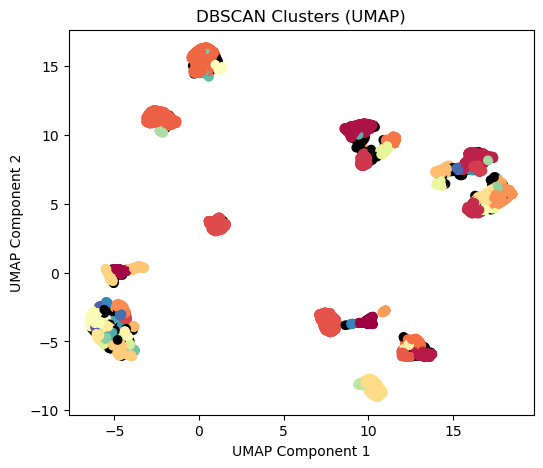

In [32]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6, 5))

unique_labels = set(db_umap_labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
color_map = {label: colors[i] for i, label in enumerate(unique_labels)}
if -1 in color_map:
    color_map[-1] = 'black'

scatter_colors = [color_map[label] for label in db_umap_labels]

plt.scatter(embed_final[:,0], embed_final[:,1], c=scatter_colors)
plt.title("DBSCAN Clusters (UMAP)")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.show()

In [33]:
print("--- Clustering Summary (after UMAP) ---")
print(f"KMeans Silhouette Score: {final_sil:.4f}")
print(f"Hierarchical Clustering Silhouette Score: {sil_hc_umap:.4f}")


if 'sil_db_umap' in locals():
    print(f"DBSCAN Silhouette Score: {sil_db_umap:.4f}")
else:
    print("DBSCAN Silhouette Score: Could not be calculated (only one cluster or all noise).")

--- Clustering Summary (after UMAP) ---
KMeans Silhouette Score: 0.6996
Hierarchical Clustering Silhouette Score: 0.6996
DBSCAN Silhouette Score: 0.2542


In [34]:
import pickle
import joblib 

umap_filename = 'umap_reducer.pkl'
with open(umap_filename, 'wb') as file:
    pickle.dump(umap_final, file)
print(f"UMAP model saved successfully to: {umap_filename}")

kmeans_filename = 'kmeans_model.joblib'
joblib.dump(kmeans_final, kmeans_filename)
print(f"KMeans model saved successfully to: {kmeans_filename}")

UMAP model saved successfully to: umap_reducer.pkl
KMeans model saved successfully to: kmeans_model.joblib
